In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output


# Any results you write to the current directory are saved as output.

In [3]:
titn = pd.read_csv(r'C:\Users\arvind_kumar21\Documents\Arvind_Backup\AI_ML_RACE\AI06_Module4\Titanic dataset\titanic.csv')


In [4]:
df = pd.read_csv(r'C:\Users\arvind_kumar21\Documents\Arvind_Backup\AI_ML_RACE\AI06_Module4\Titanic dataset\titanic.csv')[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp','Parch', 'Fare', 'Embarked']]
test = pd.read_csv(r'C:\Users\arvind_kumar21\Documents\Arvind_Backup\AI_ML_RACE\AI06_Module4\Titanic dataset\titanic.csv')[['Pclass', 'Sex', 'Age', 'SibSp','Parch', 'Fare', 'Embarked']]
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S
4,1,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
413,0,3,male,NaN,0,0,8.0500,S
414,1,1,female,39.0,0,0,108.9000,C
415,0,3,male,38.5,0,0,7.2500,S
416,0,3,male,NaN,0,0,8.0500,S


In [5]:
print(df.isna().sum())
print(test.isna().sum())

Survived     0
Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64
Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64


In [6]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['Sex'] = encoder.fit_transform(df['Sex'])
df['Embarked'] = encoder.fit_transform(df['Embarked'])
test['Sex'] = encoder.fit_transform(test['Sex'])
test['Embarked'] = encoder.fit_transform(test['Embarked'])

In [7]:
# train impute
mean_age = np.mean(df.loc[~np.isnan(df['Age']), 'Age'])
df.loc[np.isnan(df['Age']), 'Age'] = mean_age
mean_embarked = np.mean(df.loc[~np.isnan(df['Embarked']), 'Embarked'])
df.loc[np.isnan(df['Embarked']), 'Embarked'] = mean_embarked

#test impute
tmean_age = np.mean(test.loc[~np.isnan(test['Age']), 'Age'])
test.loc[np.isnan(test['Age']), 'Age'] = tmean_age
tmean_fare = np.mean(test.loc[~np.isnan(test['Fare']), 'Fare'])
test.loc[np.isnan(test['Fare']), 'Fare'] = tmean_fare

In [8]:
df['number of people'] = df['SibSp'].astype(int) + df['Parch'].astype(int) + 1
test['number of people'] = test['SibSp'].astype(int) + test['Parch'].astype(int) + 1

In [11]:
!pip install pymc3

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\arvind_kumar21\\Anaconda3\\Lib\\site-packages\\~-mpy\\.libs\\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll'
Consider using the `--user` option or check the permissions.




  Created wheel for theano-pymc: filename=Theano_PyMC-1.1.2-py3-none-any.whl size=1529975 sha256=9951902ee481a51e6cba617f9c12ffa234fb3e921bb24abd636027dab0767fe5
  Stored in directory: c:\users\arvind_kumar21\appdata\local\pip\cache\wheels\04\22\4d\832878ba2fe9ea3543f0189b9288a78e4aa4e0afc851a6890c
Successfully built theano-pymc
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4


In [12]:
from pymc3 import Model, Normal, Bernoulli, find_MAP, NUTS, sample, traceplot

ModuleNotFoundError: No module named 'pymc3'

In [10]:
y = df["Survived"]
x = df[['Pclass', 'Sex', 'Age', 'number of people', 'Fare', 'Embarked']]
x.loc[:, "Intercept"] = 1
x.loc[:, "Sex"] = ((df["Sex"] == "male") * 1)

C:\Users\arvind_kumar21\Anaconda3\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\arvind_kumar21\Anaconda3\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [15]:
!pip install theano

  Created wheel for theano: filename=Theano-1.0.5-py3-none-any.whl size=2668125 sha256=cbab65f17392e423204a2cfde19a9c21fcbe193f0d1a8fb2de6fc8c5da4342df
  Stored in directory: c:\users\arvind_kumar21\appdata\local\pip\cache\wheels\12\d8\36\e9b7c617ca8be398dcc48621c539d0cb1d41ff04e4367fc235
Successfully built theano


In [16]:
import theano.tensor as t
def tinvlogit(x):
    return t.exp(x) / (1 + t.exp(x))

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\arvind_kumar21\Anaconda3\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.


AttributeError: module 'numpy.distutils.__config__' has no attribute 'blas_opt_info'

In [17]:
logistic_model = Model()

with logistic_model:
    effects = Normal('effects', mu=0, tau=2. ** -2, shape=(1, x.shape[1]))
    
    # expected parameter
    p = tinvlogit(t.sum(effects * x, axis=1))
    
    # Likelihood (sampling distribution) of observations
    Y_obs = Bernoulli('Y_obs', p=p, observed=y)

NameError: name 'Model' is not defined

In [ ]:
with logistic_model:
    # move the chain to the MAP which should be a good starting point
    start = find_MAP()
    step = NUTS(scaling=start)
    trace = sample(5000, step, start)

In [ ]:
traceplot(trace)

In [ ]:
trace['effects']

In [ ]:
new_x = test[['Pclass', 'Sex', 'number of people', 'Age', 'Fare', 'Embarked']]
new_x.loc[:, "Intercept"] = 1
new_x.loc[:, "Sex"] = (test["Sex"] == "male") * 1
# new_x = new_x.drop("Pclass", 1)

In [ ]:
invlogit = lambda x: np.exp(x) / (1 + np.exp(x))

In [ ]:
eta = np.zeros(new_x.shape[0])
for row in trace['effects']:
    row=row[0]
    eta = np.add(eta, np.dot(new_x, row.transpose()))
eta = np.divide(eta, trace['effects'].shape[0])

In [ ]:
p = invlogit(eta)
p[:20]

In [ ]:
prediction = pd.DataFrame({'Survived_p':p})

In [35]:
titn.head(2) #show the first 2 rows from the dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [36]:
titn.info()  #checking if there is any inconsistency in the dataset
#as we see there are no null values in the dataset, so the data can be processed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [37]:
titn[titn.Age.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
10,902,0,3,"Ilieff, Mr. Ylio",male,NaN,0,0,349220,7.8958,NaN,S
22,914,1,1,"Flegenheim, Mrs. Alfred (Antoinette)",female,NaN,0,0,PC 17598,31.6833,NaN,S
29,921,0,3,"Samaan, Mr. Elias",male,NaN,2,0,2662,21.6792,NaN,C
33,925,1,3,"Johnston, Mrs. Andrew G (Elizabeth Lily"" Watson)""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
36,928,1,3,"Roth, Miss. Sarah A",female,NaN,0,0,342712,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
408,1300,1,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q
410,1302,1,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [38]:
male_survived_age_median = titn.loc[(titn['Sex'] == 'male') & (titn['Survived'] == 1), 'Age'].median()
male_death_age_median = titn.loc[(titn['Sex'] == 'male') & (titn['Survived'] == 0), 'Age'].median()
female_survived_age_median = titn.loc[(titn['Sex'] == 'female') & (titn['Survived'] == 1), 'Age'].median()
female_death_age_median = titn.loc[(titn['Sex'] == 'female') & (titn['Survived'] == 0), 'Age'].median()

In [39]:
titn.loc[(titn['Sex'] == 'male') & (titn['Survived'] == 1), 'Age'] = titn.loc[(titn['Sex'] == 'male') & (titn['Survived'] == 1), 'Age'].fillna(male_survived_age_median)

#### Removing the unneeded column

In [40]:
titn.loc[(titn['Sex'] == 'male') & (titn['Survived'] == 0), 'Age'] = titn.loc[(titn['Sex'] == 'male') & (titn['Survived'] == 0), 'Age'].fillna(male_death_age_median)

In [41]:
titn.loc[(titn['Sex'] == 'female') & (titn['Survived'] == 1), 'Age'] = titn.loc[(titn['Sex'] == 'female') & (titn['Survived'] == 1), 'Age'].fillna(female_survived_age_median)

In [42]:
titn.loc[(titn['Sex'] == 'female') & (titn['Survived'] == 0), 'Age'] = titn.loc[(titn['Sex'] == 'female') & (titn['Survived'] == 0), 'Age'].fillna(female_death_age_median)

In [43]:
titn = titn.dropna(subset=['Age'])

In [44]:
target=titn.Survived

In [45]:
inputs=titn[['Pclass','Sex','Age','Fare']]
inputs

,Pclass,Sex,Age,Fare
0,3,male,34.5,7.8292
1,3,female,47.0,7.0000
2,2,male,62.0,9.6875
3,3,male,27.0,8.6625
4,3,female,22.0,12.2875
...,...,...,...,...
413,3,male,27.0,8.0500
414,1,female,39.0,108.9000
415,3,male,38.5,7.2500
416,3,male,27.0,8.0500


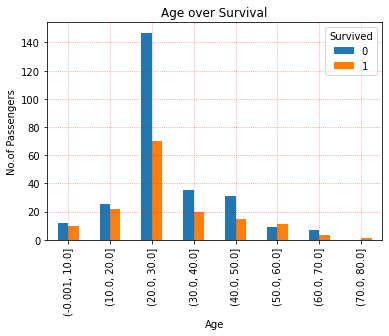

In [46]:
age_groups = pd.cut(titn['Age'], bins=range(0, 100, 10), include_lowest=True)
pd.crosstab(age_groups,titn.Survived).plot(kind='bar')
plt.ylabel('No.of Passengers')
plt.title('Age over Survival')
plt.grid(color="red", linestyle=":", alpha=0.5)

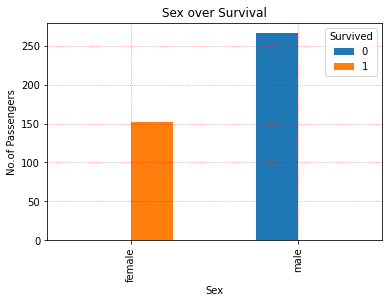

In [47]:
pd.crosstab(titn.Sex,titn.Survived).plot(kind='bar')
plt.ylabel('No.of Passengers')
plt.title('Sex over Survival')
plt.grid(color="red", linestyle=":", alpha=0.5)

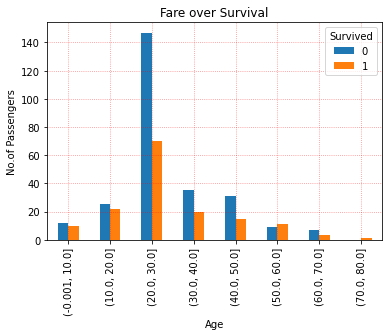

In [48]:
fare_groups = pd.cut(titn['Age'], bins=range(0, 550, 10), include_lowest=True)
pd.crosstab(fare_groups,titn.Survived).plot(kind='bar')
plt.ylabel('No.of Passengers')
plt.title('Fare over Survival')
plt.grid(color="red", linestyle=":", alpha=0.5)

In [49]:
from sklearn.preprocessing import LabelEncoder
obj=LabelEncoder()
inputs['Sex']=obj.fit_transform(inputs['Sex'])
inputs.head(4)

C:\Users\ARVIND~1\AppData\Local\Temp/ipykernel_25592/3817471325.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inputs['Sex']=obj.fit_transform(inputs['Sex'])


,Pclass,Sex,Age,Fare
0,3,1,34.5,7.8292
1,3,0,47.0,7.0000
2,2,1,62.0,9.6875
3,3,1,27.0,8.6625


In [50]:
from sklearn import tree
model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [51]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(inputs,target, test_size=0.2)

In [52]:
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [53]:
model.score(x_test,y_test)

1.0

In [54]:
model.predict([[2,1,22,100]])

C:\Users\arvind_kumar21\Anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [55]:
model.predict_proba([[2,1,22,100]])

C:\Users\arvind_kumar21\Anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([[1., 0.]])